## Analyse de données RH de l’attrition des employés d’IBM

### Description de la problématique : 

Le but de cette analyse est de découvrir les facteurs qui mènent à l'attrition (le taux d'attrition est le pourcentage des employés quittant une entreprise, c'est l'inverse du taux de rétention) des employés et ainsi le prévoir à l'aide des modèles de machine Learning. Les données qui seront traitées sont issues de données fictives créées par IBM data scientists et sont mises à disposition sur le site kaggle.com. 

### 1- Data preprocessing (step1)

In [1]:
# Import des librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import du dataset:
ibm = pd.read_excel('IBM_HR_Data.xlsx')
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
EmployeeNumber              1470 non-null int64
Age                         1470 non-null int64
Gender                      1470 non-null object
MaritalStatus               1470 non-null object
Education                   1470 non-null int64
EducationField              1470 non-null object
DistanceFromHome            1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
JobRole                     1470 non-null object
Department                  1470 non-null object
HourlyRate                  1470 non-null int64
OverTime                    1470 non-null object
DailyRate                   1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
PercentSalaryHike           1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel             

In [3]:
ibm.head() # vérification de l'import avec les 5 prémières lignes

,EmployeeNumber,Age,Gender,MaritalStatus,Education,EducationField,DistanceFromHome,Attrition,BusinessTravel,JobRole,...,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Female,Single,2,Life Sciences,1,Yes,Travel_Rarely,Sales Executive,...,2,1,1,0,8,0,6,4,0,5
1,2,49,Male,Married,1,Life Sciences,8,No,Travel_Frequently,Research Scientist,...,3,4,3,1,10,3,10,7,1,7
2,4,37,Male,Single,2,Other,2,Yes,Travel_Rarely,Laboratory Technician,...,4,2,3,0,7,3,0,0,0,0
3,5,33,Female,Married,4,Life Sciences,3,No,Travel_Frequently,Research Scientist,...,4,3,3,0,8,3,8,7,3,0
4,7,27,Male,Married,1,Medical,2,No,Travel_Rarely,Laboratory Technician,...,1,4,3,1,6,3,2,2,2,2


Résumé :

-	Le jeu de données comporte 1470 individus 
-	32 variables : 8 qualitatives et 24 quantitatives
-	Nous n’avons pas de valeurs manquantes


### 2- Data Mining

#### A- Analyse univariée

In [4]:
ibm.describe() #statistique descriptive pour nos 25 variables quantitatives

,EmployeeNumber,Age,Education,DistanceFromHome,HourlyRate,DailyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,JobInvolvement,...,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,2.912925,9.192517,65.891156,802.485714,6502.931293,14313.103401,15.209524,2.729932,...,2.721769,2.712245,2.761224,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,1.024165,8.106864,20.329428,403.509100,4707.956783,7117.786044,3.659938,0.711561,...,1.093082,1.081209,0.706476,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,30.000000,102.000000,1009.000000,2094.000000,11.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,2.000000,48.000000,465.000000,2911.000000,8047.000000,12.000000,2.000000,...,2.000000,2.000000,2.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,3.000000,7.000000,66.000000,802.000000,4919.000000,14235.500000,14.000000,3.000000,...,3.000000,3.000000,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,4.000000,14.000000,83.750000,1157.000000,8379.000000,20461.500000,18.000000,3.000000,...,4.000000,4.000000,3.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,5.000000,29.000000,100.000000,1499.000000,19999.000000,26999.000000,25.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Nous allons observer plus en détail la distribution de certaines variables quantitatives : Age, DistanceFromHome, MonthlyIncome ,TotalWorkingYears,YearsAtCompany, YearsInCurrentRole

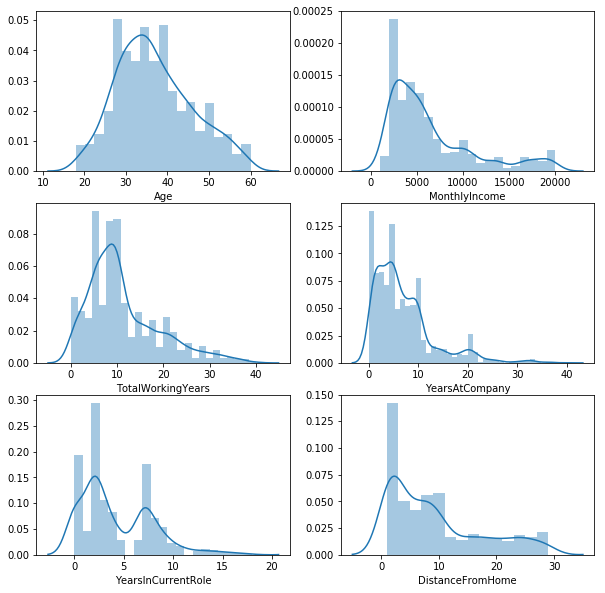

In [5]:
fig, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=3) 
sns.distplot(ibm['Age'], ax = ax[0,0])  
sns.distplot(ibm['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(ibm['YearsAtCompany'], ax = ax[1,1]) 
sns.distplot(ibm['TotalWorkingYears'], ax = ax[1,0])
sns.distplot(ibm['YearsInCurrentRole'], ax = ax[2,0])
sns.distplot(ibm['DistanceFromHome'], ax = ax[2,1])
plt.show()

En Résumé : 
- L'âge moyen dans cette entreprise est proche de 37 ans   
- Le salaire moyen est de 6502 doallars avec une concentration des salaires entre 0 et 5000 dollars par mois. Cet effet est observable sur la représentation graphique de la distribution de la variable MonthlyIncome
- Les employés font en moyenne 7 ans chez IBM. Ils passent 4 ans en moyenne sur un poste avec le même manager.
- Les employés parcours en moyenne 9 km pour se rendre au travail, avec une forte disparité. En effet, on constate une forte concentration des distances entre 0 et 5 km.

#### B- Analyse bivariée

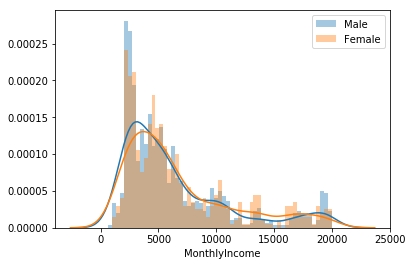

In [6]:
# Explorons la distribution des salaires mensuels entre homme et femme
sns.distplot(ibm.MonthlyIncome[ibm.Gender == 'Male'], bins = np.linspace(0,20000,60))
sns.distplot(ibm.MonthlyIncome[ibm.Gender == 'Female'], bins = np.linspace(0,20000,60))
plt.legend(['Male','Female'])

La disparité entre les salaires des hommes et des femmes ne présentent pas une très grande disparité dans notre jeu de données.
Cependant, pour les revenus mensuels entre 0 et 5000 dollars et les hauts revenus entre 15000 et 20000 dollars par mois, les hommes sont au-dessus des femmes. 
Par ailleurs, nous constatons que les salaires des femmes est supérieurs à ceux des hommes entre 10000 et 15000 dollars. Nous pouvons confirmer ces disparités relatives en calculant le salaire médian, mais aussi le salaire moyen par genre et en les comparants.

In [7]:
med_homme = np.median(ibm.MonthlyIncome[ibm.Gender == 'Male'])
med_femme = np.median(ibm.MonthlyIncome[ibm.Gender == 'Female'])
moy_homme = np.mean(ibm.MonthlyIncome[ibm.Gender == 'Male'])
moy_femme = np.mean(ibm.MonthlyIncome[ibm.Gender == 'Female'])

In [8]:
med_femme

5081.5

In [9]:
med_homme

4837.5

In [10]:
moy_femme

6686.566326530612

In [11]:
moy_homme

6380.507936507936

La comparaison des salaires moyens et médians entre homme et femme confirme bien notre première analyse.

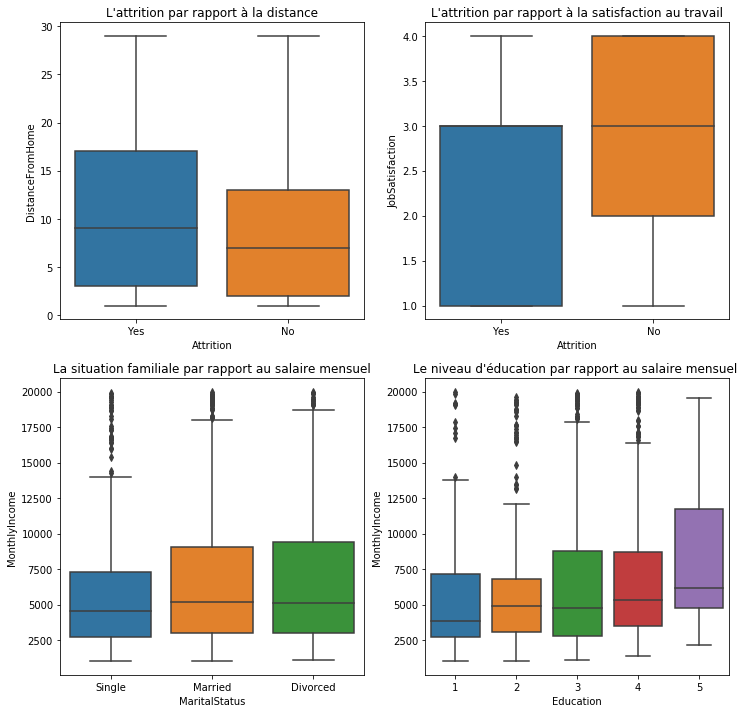

In [12]:
# Comparaison des variables 2 à 2 par des box plots
fig, ax = plt.subplots(figsize=(12,12), ncols=2, nrows=2)

sns.boxplot(ibm["Attrition"],ibm["DistanceFromHome"], ax = ax[0,0])
ax[0,0].set( title = "L'attrition par rapport à la distance" )

sns.boxplot(ibm["Attrition"],ibm["JobSatisfaction"], ax = ax[0,1])
ax[0,1].set( title = "L'attrition par rapport à la satisfaction au travail" )

sns.boxplot(ibm["MaritalStatus"],ibm["MonthlyIncome"], ax = ax[1,0])
ax[1,0].set( title = "La situation familiale par rapport au salaire mensuel" )

sns.boxplot(ibm["Education"],ibm["MonthlyIncome"], ax = ax[1,1])
ax[1,1].set( title = "Le niveau d'éducation par rapport au salaire mensuel " )
plt.show()

Interprétation :
-	L'attrition par rapport à la distance parcourue par les employer pour se rendre au travail (variables « Attrition » par rapport à «DistanceFromHome», position graphique : [1,1]): Plus un salarié habite loin plus il y a un risque qu’il quitte l’entreprise.

-	L'attrition par rapport à la satisfaction au travail (variable « Attrition » par rapport à «JobSatisfaction», position graphique : [1,2]): Moins un salarié est satisfait, plus le risque de quitter l’entreprise est élevé. Il y a lien fort entre ses deux variables.


-	La situation familiale par rapport au salaire mensuel (variable « MaritalStatus » par rapport à «MonthlyIncome», position graphique : [2,1]) : Les célibataires gagnent moins que les mariés et les divorcés.


-	Le niveau d'éducation par rapport au salaire mensuel (variable «Education » par rapport à «MonthlyIncome», position graphique : [2,2]) : Plus un salarié est éduqué, plus il gagne mieux.


#### C- Analyse multivariée

In [13]:
#Matrice des corrélations
matrice_corr=ibm.corr()

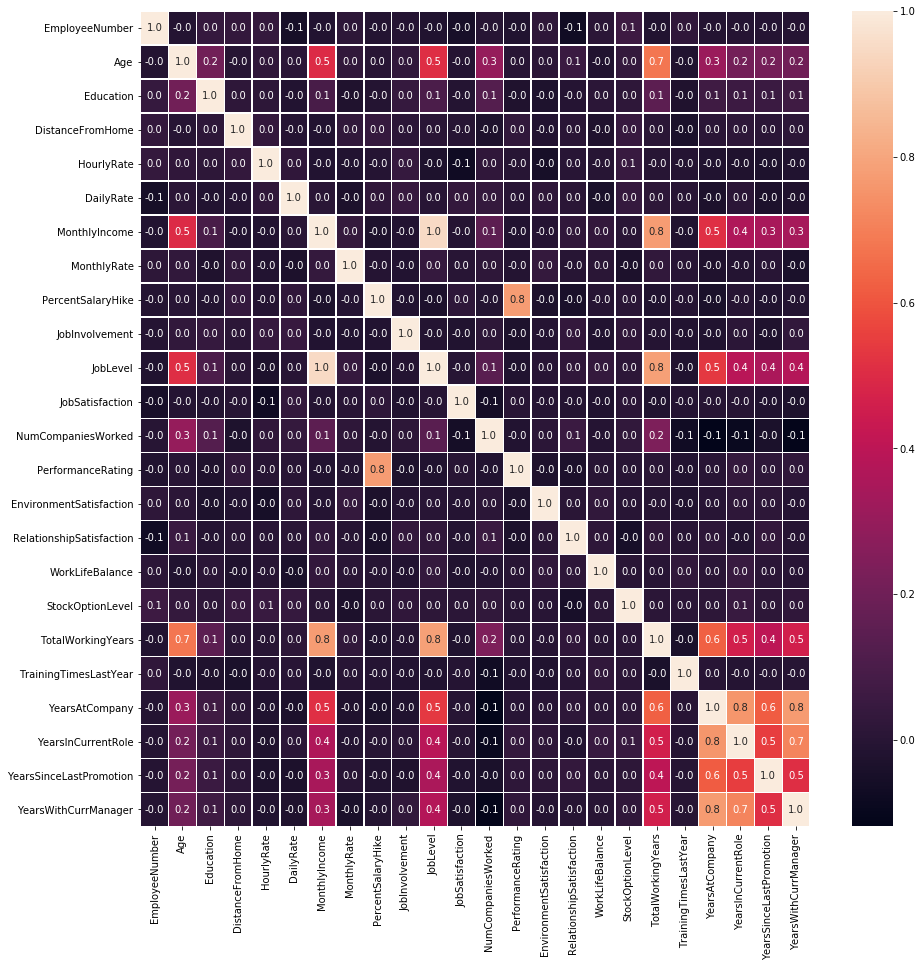

In [15]:
# Représentation graphique de la matrice des corrélations
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(ibm.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('fig1')

Nous remarquons que plusieurs variables n’ont pas de lien entre elles. 

Cependant, des forts liens existent entre : TotalWorkingYears et MonthlyIncome, entre TotalWorkingYears et Age, entre TotalWorkingYears et Joblevel, entre PerformanceRting et PercentSatisfactionHike, entre YearsInCurrentRole et YearATCompagny et entre YearsWithCurrManager et YearsAtCompagny.

### 3 - Data preprocessing (step2) 

In [16]:
# séparation des variables quantitatives et qualitatives et de la variable 'Attrition' : 
quant1_ibm = ibm.iloc[:, [1,4,6,11]]
quant2_ibm = ibm.iloc[:, 13:32]
quant_ibm = pd.concat([quant1_ibm, quant2_ibm], axis=1) #dataframe : quanti

In [17]:
quali1_ibm = ibm.iloc[:, [2,3,5,12]]
quali2_ibm = ibm.iloc[:, [8,9,10]]
quali_ibm = pd.concat([quali1_ibm, quali2_ibm], axis=1) #dataframe : quali

In [18]:
Variable_attrition = ibm.iloc[:, 7] 

In [19]:
# Encoder les variables qualitatives hors Attrition :
quali_ibm = pd.get_dummies(quali_ibm)

In [20]:
# Encoder la variable 'Attrition' :
from sklearn.preprocessing import LabelBinarizer
labelencoder_attrition = LabelBinarizer()
Variable_attrition = labelencoder_attrition.fit_transform(Variable_attrition)

In [21]:
x = pd.concat([quant_ibm, quali_ibm], axis = 1)
y = Variable_attrition

In [23]:
x.head()

,Age,Education,DistanceFromHome,HourlyRate,DailyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,2,1,94,1102,5993,19479,11,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,1,8,61,279,5130,24907,23,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,2,2,92,1373,2090,2396,15,2,1,...,1,0,0,0,0,0,0,0,1,0
3,33,4,3,56,1392,2909,23159,11,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,1,2,40,591,3468,16632,12,3,1,...,1,0,0,0,0,0,0,0,1,0


Notre jeu de données final représente 52 variables quantitatives hors la variable (Y) cible qui est l'attrition.

### 4- Machine learning

Après avoir effectué une analyse exploratoire des données et un recodage des variables qualitatives, nous sommes maintenant prêts à construire nos modèles de machine learning.
Ici nous sommes en face d'un problème de classification.
Nous utiliserons quelques différents modèles de machine learning : 
- Gradient Boosting Classifier
- Régression logistique
- SVM
- Kernel SVM

In [24]:
#Partition de l'échantillon en deux parties, entrainement et test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [25]:
# Feature scaling : mettre les variable sur la même echelle
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
x_train

array([[-0.75016842,  0.06512323, -0.51036458, ..., -0.21877273,
        -1.37789388,  1.53000297],
       [-0.41863372,  0.06512323, -0.51036458, ..., -0.21877273,
        -1.37789388,  1.53000297],
       [ 0.90750511,  1.06529941,  1.84630474, ...,  4.57095362,
        -1.37789388, -0.6535935 ],
       ...,
       [ 0.68648197,  0.06512323, -0.88247026, ..., -0.21877273,
        -1.37789388,  1.53000297],
       [ 0.13392413,  2.0654756 , -0.88247026, ..., -0.21877273,
         0.72574529, -0.6535935 ],
       [ 0.35494726,  1.06529941,  0.10981156, ..., -0.21877273,
        -1.37789388,  1.53000297]])

In [27]:
x_test.shape

(441, 51)

#### A- Regression logistique :

In [28]:
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression(random_state = 0)
logist.fit(x_train, y_train)

C:\Users\IAD\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred1 = logist.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
logist_cm = confusion_matrix(y_test, y_pred1) # matrice de classement du modèle
logist_accuracy = accuracy_score(y_test, y_pred1) # score de de classement (positif/négative) correcte/total
logist_er = 1 - logist_accuracy

In [33]:
logist_cm

array([[360,  11],
       [ 40,  30]], dtype=int64)

In [34]:
logist_accuracy

0.8843537414965986

In [35]:
logist_er

0.11564625850340138

In [61]:
logist.score(x_test,y_test)

0.8843537414965986

### B - Kernel SVM

In [42]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'sigmoid', random_state = 0)
ksvm.fit(x_train, y_train)

C:\Users\IAD\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_pred3 = ksvm.predict(x_test)
ksvm_cm = confusion_matrix(y_test, y_pred2)
ksvm_accuracy = accuracy_score(y_test, y_pred2)
ksvm_er = 1 - ksvm_accuracy # claculons le taux d'érreur du modèle l'inverse du score de l'accuracy

In [44]:
ksvm_cm

array([[361,  10],
       [ 42,  28]], dtype=int64)

In [45]:
ksvm_accuracy

0.8820861678004536

In [46]:
ksvm_er

0.11791383219954643

In [62]:
ksvm.score(x_test,y_test)

0.8866213151927438

### D - Gradien Boosting classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

C:\Users\IAD\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
y_pred4 = gb.predict(x_test)
gb_cm = confusion_matrix(y_test, y_pred3)
gb_accuracy = accuracy_score(y_test, y_pred3)

0.873015873015873

In [49]:
gb_cm

array([[367,   4],
       [ 46,  24]], dtype=int64)

In [50]:
gb_accuracy

0.8866213151927438

In [51]:
gb_er

0.11337868480725621

In [59]:
gb.score(x_test,y_test)

0.873015873015873

on remarque que les modèles logistique et GB ont les mêmes performances.

Nous allons à présent regarder les variables qui sont les plus d'importantes dans la mise en place du model gb :

Text(0.5,0,'Importance relative')

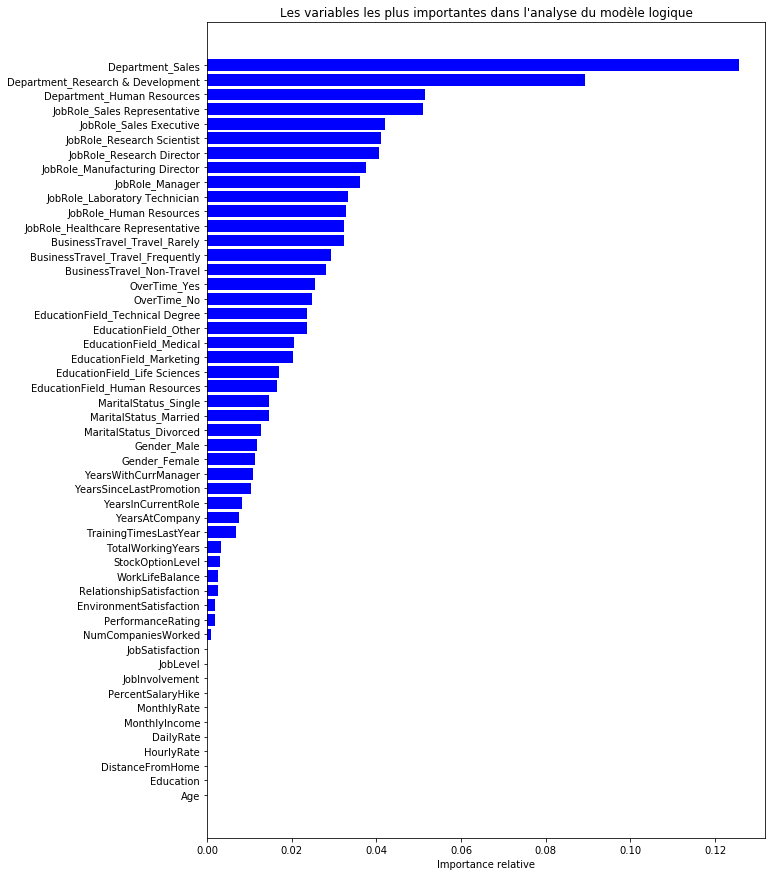

In [57]:
# FR
f_importance = gb.feature_importances_
indices = np.argsort(f_importance)

plt.figure(figsize=(10, 15))
plt.title("Les variables les plus importantes dans l'analyse du modèle logique")
plt.barh(range(len(indices)), f_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), x.columns)
plt.xlabel('Importance relative')

### Conclusion
Nous avons construit à partir des modèles de Machine Learning une méthode de prédiction de l'attrition des employés, allant de l'analyse statistique exploratoire au code optimal des variables qualitatives, en passant par trois modèles de classification regression logistique, Gradient Boosting et kernet SVM.

A la suite de l’entrainement de nos modèles d’apprentissage, nous avons retenu deux modèles, la regression logistique, Grandient Boosting pour un pourcentage d’exactitude prévisionnel de 88 et de 87% respectivement.Par ailleurs, nous retenons un taux accuracy (poucentage de bien classé) de 88,4 et de 88,6% pour la regression logistique, le Grandient Boosting. 

Les recommandations pour éviter l’attrition des employés:
- Lancer un audit des ressources humaines pour étudier les facteurs qui touchent plus à l'attriton à savoir l'affectation des employer dans chaque département.
- Proposer des mouvements internes et des changement de poste aux employés succeptible de quitter l'entreprise 